In [19]:
! sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib-rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [13]:
import openpyxl
from openpyxl.styles import Alignment, Font, PatternFill


competitor_data = [
    ["회사명", "7/24 종가", "7/28 종가", "등락", "시가총액"],
    ["SGA솔루션즈", 800, 745, -55, "404억"],
    ["서울반도체", 986, 1015, 29, "447억"],
    ["안랩", 62700, 62000, -700, "6,229억"],
    ["모니터랩", 7200, 6200, -1000, "804억"],
    ["이스트소프트", 13600, 13000, -600, "1,630억"],
    ["케이사인", 1447, 1447, 0, "1,023억"],
    ["신준혁", 9460, 9230, -230, "1,393억"],
    ["라온시큐어", 2445, 2365, -80, "914억"],
    ["한국정보인증", 2800, 2720, -80, "1,951억"],
    ["이글루", 2445, 2300, -145, "914억"],
    ["파이오링크", 11400, 10500, -900, "1,259억"],
    ["윈스", 14320, 13530, -790, "1,925억"],
    ["지니언스", 7540, 7440, -100, "867억"],
    ["파수", 7540, 7440, -100, "930억"],
    ["트렌드마이크로", 3080, 3070, -10, "1,554억"]
]


# **엑셀 워크북 생성**
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Competitor Stock Report"

# **1. 제목 추가**
ws.merge_cells("A1:E1")
ws["A1"] = "경쟁사 주가 현황 (7/24 ~ 7/28)"
ws["A1"].font = Font(size=14, bold=True, color="FFFFFF")
ws["A1"].alignment = Alignment(horizontal="center", vertical="center")
ws["A1"].fill = PatternFill(start_color="1F4E78", end_color="1F4E78", fill_type="solid")

# **2. 경쟁사 데이터 작성**
start_row = 3  # 데이터 시작 행
for row_idx, row_data in enumerate(competitor_data, start=start_row):
    for col_idx, value in enumerate(row_data, start=1):
        cell = ws.cell(row=row_idx, column=col_idx)
        cell.value = value

        # 헤더 스타일
        if row_idx == start_row:
            cell.font = Font(bold=True)
            cell.fill = PatternFill(start_color="BDD7EE", end_color="BDD7EE", fill_type="solid")
            cell.alignment = Alignment(horizontal="center", vertical="center")
        else:
            # 숫자 정렬
            if col_idx != 1:  # 회사명을 제외한 열
                cell.alignment = Alignment(horizontal="center", vertical="center")
            # 음수 값에 빨간색 적용
            if col_idx == 4 and isinstance(value, (int, float)) and value < 0:
                cell.font = Font(color="FF0000")  # 빨간색
            elif col_idx == 4 and isinstance(value, (int, float)) and value > 0:
                cell.font = Font(color="008000")  # 초록색

# **엑셀 저장**
wb.save("Competitor_Stock_Report.xlsx")
print("Competitor Stock Report 생성 완료!")



Competitor Stock Report 생성 완료!


In [14]:
import openpyxl
from openpyxl.styles import Alignment, Font, PatternFill
from openpyxl.chart import LineChart, Reference

# 데이터 준비
competitor_data = [
    ["회사명", "7/24 종가", "7/28 종가", "등락", "시가총액"],
    ["SGA솔루션즈", 800, 745, -55, "404억"],
    ["서울반도체", 986, 1015, 29, "447억"],
    ["안랩", 62700, 62000, -700, "6,229억"],
    ["모니터랩", 7200, 6200, -1000, "804억"],
    ["이스트소프트", 13600, 13000, -600, "1,630억"],
    ["케이사인", 1447, 1447, 0, "1,023억"],
    ["신준혁", 9460, 9230, -230, "1,393억"],
    ["라온시큐어", 2445, 2365, -80, "914억"],
    ["한국정보인증", 2800, 2720, -80, "1,951억"],
    ["이글루", 2445, 2300, -145, "914억"],
    ["파이오링크", 11400, 10500, -900, "1,259억"],
    ["윈스", 14320, 13530, -790, "1,925억"],
    ["지니언스", 7540, 7440, -100, "867억"],
    ["파수", 7540, 7440, -100, "930억"],
    ["트렌드마이크로", 3080, 3070, -10, "1,554억"]
]

weekly_issues = [
    "더 벌어진 한미 금리차... 금리 자본유출 없을 것",
    "북한 해커그룹, 미국 소프트웨어 기업 '컨트롤라우드' 공격",
    "빠르게 자라는 아카이브 랜섬웨어, 현재 60여 보안 조직 협력 중",
    "KISIA, 제로트러스트원외회 3차 회의 개최"
]

public_notices = [
    "전환사채 발행 후 만기 전 사채취득 예정 (7/31)",
    "2023년 반기보고서 제출 (8/11)"
]

stock_data = {
    "날짜": ["7/24", "7/25", "7/26", "7/27", "7/28"],
    "종가": [850, 830, 820, 800, 745],
    "거래량": [222095, 158140, 143894, 120000, 105000]
}

investor_trends = [
    "기관 17주 순매도",
    "개인 17만주 순매도",
    "외국인 17만주 순매수",
    "거래대금 대다수 2차전지에 집중"
]

# 엑셀 워크북 생성
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Weekly Report"

# 제목 추가
ws.merge_cells("A1:L1")
ws["A1"] = "IR Weekly Report (7/24 ~ 7/28)"
ws["A1"].font = Font(size=14, bold=True, color="FFFFFF")
ws["A1"].alignment = Alignment(horizontal="center", vertical="center")
ws["A1"].fill = PatternFill(start_color="1F4E78", end_color="1F4E78", fill_type="solid")

# 1. 주간 주요 이슈
ws["A3"] = "주간 주요 이슈"
ws["A3"].font = Font(size=12, bold=True, color="000000")
start_row = 4
for idx, issue in enumerate(weekly_issues, start=start_row):
    ws.cell(row=idx, column=1).value = f"● {issue}"
    ws.cell(row=idx, column=1).alignment = Alignment(horizontal="left", vertical="center")



# 3. 경쟁사 주가 현황
ws["H3"] = "경쟁사 주가 현황"
ws["H3"].font = Font(size=12, bold=True, color="000000")
start_row = 4
for row_idx, row_data in enumerate(competitor_data, start=start_row):
    for col_idx, value in enumerate(row_data, start=8):
        cell = ws.cell(row=row_idx, column=col_idx)
        cell.value = value
        if row_idx == start_row:  # 헤더 스타일 적용
            cell.font = Font(bold=True)
            cell.fill = PatternFill(start_color="BDD7EE", end_color="BDD7EE", fill_type="solid")
            cell.alignment = Alignment(horizontal="center", vertical="center")
        elif col_idx == 4 and isinstance(value, (int, float)) and value < 0:  # 등락 음수 빨간색
            cell.font = Font(color="FF0000")

# 2. 공시
ws["A8"] = "공시"
ws["A8"].font = Font(size=12, bold=True, color="000000")
start_row = 9
for idx, notice in enumerate(public_notices, start=start_row):
    ws.cell(row=idx, column=1).value = f"● {notice}"
    ws.cell(row=idx, column=1).alignment = Alignment(horizontal="left", vertical="center")
'''
# 3. 경쟁사 주가 현황
ws["H3"] = "경쟁사 주가 현황"
ws["H3"].font = Font(size=12, bold=True, color="000000")
start_row = 4
for row_idx, row_data in enumerate(competitor_data, start=start_row):
    for col_idx, value in enumerate(row_data, start=1):
        cell = ws.cell(row=row_idx, column=col_idx)
        cell.value = value
        if row_idx == start_row:  # 헤더 스타일 적용
            cell.font = Font(bold=True)
            cell.fill = PatternFill(start_color="BDD7EE", end_color="BDD7EE", fill_type="solid")
            cell.alignment = Alignment(horizontal="center", vertical="center")
        elif col_idx == 4 and isinstance(value, (int, float)) and value < 0:  # 등락 음수 빨간색
            cell.font = Font(color="FF0000")
'''
# 4. 금주 매매동향 데이터 작성
ws["A12"] = "금주 매매동향"
ws["A12"].font = Font(size=12, bold=True, color="000000")
df_start_row = 13
for idx, (date, price, volume) in enumerate(zip(stock_data["날짜"], stock_data["종가"], stock_data["거래량"]), start=df_start_row):
  ws.cell(row=idx, column=1).value = date
  ws.cell(row=idx, column=2).value = price
  ws.cell(row=idx, column=3).value = volume


# 라인 차트 생성
line_chart = LineChart()
data = Reference(ws, min_col=2, min_row=df_start_row, max_row=df_start_row + len(stock_data["날짜"]) - 1)
line_chart.add_data(data, titles_from_data=False)
line_chart.title = "종가 추이"
line_chart.x_axis.title = "날짜"
line_chart.y_axis.title = "종가"
ws.add_chart(line_chart, "A25")
'''


'''
'''# 5. 투자자별 매매동향
ws["A30"] = "투자자별 매매동향"
ws["A30"].font = Font(size=12, bold=True, color="000000")
start_row = 31
for idx, trend in enumerate(investor_trends, start=start_row):
    ws.cell(row=idx, column=1).value = f"● {trend}"
    ws.cell(row=idx, column=1).alignment = Alignment(horizontal="left", vertical="center")'''

# 엑셀 파일 저장
wb.save("Weekly_Report_Full.xlsx")
print("Weekly Report 생성 완료!")


Weekly Report 생성 완료!


In [15]:
import openpyxl
from openpyxl.chart import LineChart, BarChart, Reference
from openpyxl.styles import Alignment, Font, PatternFill

# **데이터 준비**
# 날짜별 종가와 거래량 데이터
stock_data = {
    "날짜": ["7/24", "7/25", "7/26", "7/27", "7/28"],
    "종가": [800, 779, 721, 745, 745],
    "거래량": [222095, 158140, 450484, 234938, 83439]
}

# **엑셀 워크북 생성**
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Stock Trends"

# **1. 데이터 입력**
ws.append(["날짜", "종가", "거래량"])  # 헤더
for date, price, volume in zip(stock_data["날짜"], stock_data["종가"], stock_data["거래량"]):
    ws.append([date, price, volume])

# **2. 바 차트(거래량) 생성**
bar_chart = BarChart()
bar_chart.title = "금주매매동향"
bar_chart.style = 12
bar_chart.y_axis.title = "거래량"
bar_chart.x_axis.title = "날짜"

# 바 차트 데이터 범위 지정
data = Reference(ws, min_col=3, min_row=2, max_row=len(stock_data["날짜"]) + 1)
categories = Reference(ws, min_col=1, min_row=2, max_row=len(stock_data["날짜"]) + 1)
bar_chart.add_data(data, titles_from_data=False)
bar_chart.set_categories(categories)
bar_chart.y_axis.axId = 200  # Y축 ID 설정

# **3. 라인 차트(종가) 생성**
line_chart = LineChart()
line_chart.y_axis.title = "종가"
line_chart.style = 13

# 라인 차트 데이터 범위 지정
line_data = Reference(ws, min_col=2, min_row=2, max_row=len(stock_data["날짜"]) + 1)
line_chart.add_data(line_data, titles_from_data=False)
line_chart.set_categories(categories)

# **4. 차트 결합**
line_chart.y_axis.crosses = "max"  # 라인 차트 Y축 오른쪽으로 이동
bar_chart += line_chart  # 바 차트와 라인 차트를 결합

# **5. 차트 삽입**
ws.add_chart(bar_chart, "E5")  # 차트를 E5 셀에 삽입

# **6. 스타일 추가**
# 제목 스타일 설정
ws["A1"].value = "금주매매동향"
ws["A1"].font = Font(size=14, bold=True, color="1F4E78")
ws["A1"].alignment = Alignment(horizontal="left", vertical="center")
ws.merge_cells("A1:D1")  # 제목 셀 병합

# 엑셀 파일 저장
wb.save("Stock_Trend_Chart.xlsx")
print("금주매매동향 그래프 생성 완료!")


금주매매동향 그래프 생성 완료!


In [16]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False



from openpyxl import Workbook
from openpyxl.drawing.image import Image

# **1. 데이터 준비**
dates = ["7/24", "7/25", "7/26", "7/27", "7/28"]
closing_prices = [800, 779, 721, 745, 745]
volumes = [222095, 158140, 450484, 234938, 83439]

# **2. Matplotlib로 그래프 생성**
plt.figure(figsize=(10, 6))

# 거래량 (막대 그래프)
plt.bar(dates, volumes, color="gray", alpha=0.7, label="거래량")

# 종가 (라인 그래프)
plt.plot(dates, closing_prices, color="blue", marker="o", label="종가")

# 그래프 꾸미기
plt.title("금주매매동향", fontsize=16, weight="bold")
plt.xlabel("날짜", fontsize=12)
plt.ylabel("거래량 및 종가", fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 이미지 저장
graph_filename = "trend_chart.png"
plt.savefig(graph_filename)
plt.close()

# **3. OpenPyXL로 엑셀 파일 생성 및 이미지 삽입**
wb = Workbook()
ws = wb.active
ws.title = "Stock Trends"

# 제목 추가
ws["A1"] = "금주매매동향"
ws["A1"].font = Font(size=14, bold=True)

# 그래프 이미지 삽입
img = Image(graph_filename)
img.anchor = "A3"  # 그래프 위치 지정
ws.add_image(img)

# 엑셀 저장
excel_filename = "Stock_Trend_Excel.xlsx"
wb.save(excel_filename)

print(f"{excel_filename} 파일에 그래프가 성공적으로 추가되었습니다!")


<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.savefig(graph_filename)
<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.savefig(graph_filename)
<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.savefig(graph_filename)
<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.savefig(graph_filename)
<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.savefig(graph_filename)
<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.savefig(graph_filename)
<ipython-input-16-2f02c95f8abd>:33: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) miss

Stock_Trend_Excel.xlsx 파일에 그래프가 성공적으로 추가되었습니다!


In [17]:
import matplotlib.font_manager as fm

# 사용 가능한 폰트 리스트 출력
for font in fm.findSystemFonts(fontpaths=None, fontext="ttf"):
    print(fm.FontProperties(fname=font).get_name())

Liberation Sans
NanumMyeongjo
NanumSquareRound
Liberation Serif
Liberation Serif
Liberation Sans Narrow
Liberation Sans
Liberation Mono
NanumGothicCoding
NanumSquareRound
NanumBarunGothic
NanumMyeongjo
NanumGothic
Liberation Serif
Liberation Mono
NanumSquare
NanumGothic
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Mono
Liberation Sans
NanumBarunGothic
NanumSquare
Liberation Sans
Liberation Serif
Liberation Sans Narrow
Humor Sans
NanumGothicCoding
Liberation Mono


In [20]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

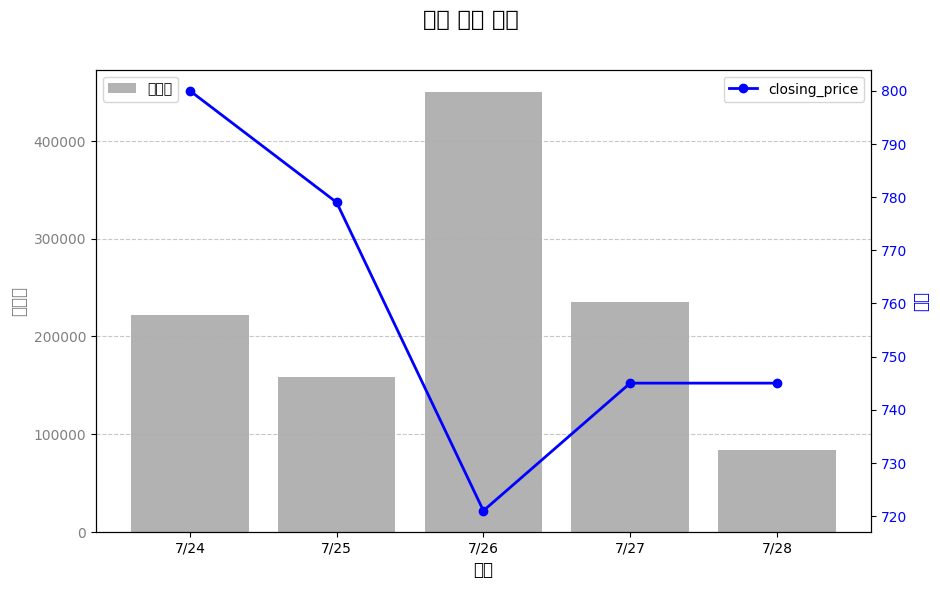

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False


# **데이터 준비**
dates = ["7/24", "7/25", "7/26", "7/27", "7/28"]
closing_prices = [800, 779, 721, 745, 745]
volumes = [222095, 158140, 450484, 234938, 83439]

# **그래프 생성**
fig, ax1 = plt.subplots(figsize=(10, 6))

# **1. 막대 그래프 (거래량)**
ax1.bar(dates, volumes, color="gray", alpha=0.6, label="거래량")
ax1.set_xlabel("날짜", fontsize=12)
ax1.set_ylabel("거래량", fontsize=12, color="gray")
ax1.tick_params(axis="y", labelcolor="gray")

# **2. 꺾은선 그래프 (종가)**
ax2 = ax1.twinx()  # Y축 공유
ax2.plot(dates, closing_prices, color="blue", marker="o", linestyle="-", linewidth=2, label="closing_price")
ax2.set_ylabel("종가", fontsize=12, color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# **범례 및 제목**
fig.suptitle("금주 매매 동향", fontsize=16, weight="bold")  # 한글 제목
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# **그리드 추가**
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# **그래프 출력**
plt.show()

